#**Text Generation Using Different Types of RNN Model**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Convert CSV file to Txt File

csv_data = "/content/drive/MyDrive/Data_Mining_NLP_Group_4/Codes_Documentation/TextGeneration/Reviews.csv"  # Path of the CSV

df = pd.read_csv(csv_data)
content = '\n'.join(df['Reviews'].astype(str))

with open('/content/drive/MyDrive/Data_Mining_NLP_Group_4/Codes_Documentation/TextGeneration/my_file.txt', 'w') as file:
    file.write(content)

In [7]:
# Create functions for every model

def LSTM_Model(total_words, max_sequence_len):
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))
    model.add(LSTM(128))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(total_words, activation='softmax'))
    return model

def GRU_Model(total_words, max_sequence_len):
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))
    model.add(GRU(128))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(total_words, activation='softmax'))
    return model

def BiLSTM_Model(total_words, max_sequence_len):
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(total_words, activation='softmax'))
    return model

In [8]:
# Read data from file
data = open('/content/drive/MyDrive/Data_Mining_NLP_Group_4/Codes_Documentation/TextGeneration/my_file.txt').read()

# Preprocess the data
c_data = [line.strip().lower() for line in data.split("\n")]

In [9]:
# Tokenize the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(c_data)
total_words = len(tokenizer.word_index) + 1

# Generate input sequences
input_sequences = []
for line in c_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

In [10]:
# Pad input sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen=max_sequence_len,
                                         padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
# Build LSTM model
lstm_model = LSTM_Model(total_words, max_sequence_len)

# Build GRU model
gru_model = GRU_Model(total_words, max_sequence_len)

# Build Bidirectional LSTM model
bilstm_model = BiLSTM_Model(total_words, max_sequence_len)

In [ ]:
optimizer = 'rmsprop' # Adam(learning_rate=0.01)
epoch = 1000
patience = 20
size = 12

# Compile models
lstm_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
gru_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
bilstm_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Define early stopping
earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=patience, verbose=2)

In [ ]:
# Train LSTM model
print("Training LSTM model...")
lstm_history = lstm_model.fit(xs, ys, batch_size=size,
                              epochs=epoch, verbose=2, callbacks=[earlystop])

Training LSTM model...
Epoch 1/1000
359/359 - 18s - loss: 6.0307 - accuracy: 0.0562 - 18s/epoch - 50ms/step
Epoch 2/1000
359/359 - 4s - loss: 5.7825 - accuracy: 0.0572 - 4s/epoch - 10ms/step
Epoch 3/1000
359/359 - 3s - loss: 5.6474 - accuracy: 0.0660 - 3s/epoch - 8ms/step
Epoch 4/1000
359/359 - 3s - loss: 5.5055 - accuracy: 0.0760 - 3s/epoch - 9ms/step
Epoch 5/1000
359/359 - 3s - loss: 5.3376 - accuracy: 0.0913 - 3s/epoch - 8ms/step
Epoch 6/1000
359/359 - 3s - loss: 5.1949 - accuracy: 0.1125 - 3s/epoch - 7ms/step
Epoch 7/1000
359/359 - 2s - loss: 5.0578 - accuracy: 0.1343 - 2s/epoch - 7ms/step
Epoch 8/1000
359/359 - 2s - loss: 4.9263 - accuracy: 0.1487 - 2s/epoch - 6ms/step
Epoch 9/1000
359/359 - 3s - loss: 4.8053 - accuracy: 0.1761 - 3s/epoch - 8ms/step
Epoch 10/1000
359/359 - 2s - loss: 4.6694 - accuracy: 0.1914 - 2s/epoch - 7ms/step
Epoch 11/1000
359/359 - 2s - loss: 4.5465 - accuracy: 0.2121 - 2s/epoch - 6ms/step
Epoch 12/1000
359/359 - 2s - loss: 4.4245 - accuracy: 0.2365 - 2s/epo

In [ ]:
# Train GRU model
print("Training GRU model...")
gru_history = gru_model.fit(xs, ys, batch_size=size,
                            epochs=epoch, verbose=2, callbacks=[earlystop])

Training GRU model...
Epoch 1/1000
359/359 - 17s - loss: 6.1005 - accuracy: 0.0569 - 17s/epoch - 49ms/step
Epoch 2/1000
359/359 - 3s - loss: 5.7197 - accuracy: 0.0611 - 3s/epoch - 9ms/step
Epoch 3/1000
359/359 - 3s - loss: 5.5440 - accuracy: 0.0774 - 3s/epoch - 8ms/step
Epoch 4/1000
359/359 - 3s - loss: 5.3273 - accuracy: 0.1001 - 3s/epoch - 10ms/step
Epoch 5/1000
359/359 - 3s - loss: 5.0864 - accuracy: 0.1255 - 3s/epoch - 8ms/step
Epoch 6/1000
359/359 - 3s - loss: 4.8267 - accuracy: 0.1594 - 3s/epoch - 7ms/step
Epoch 7/1000
359/359 - 2s - loss: 4.5718 - accuracy: 0.2061 - 2s/epoch - 7ms/step
Epoch 8/1000
359/359 - 2s - loss: 4.3594 - accuracy: 0.2214 - 2s/epoch - 7ms/step
Epoch 9/1000
359/359 - 3s - loss: 4.1635 - accuracy: 0.2486 - 3s/epoch - 8ms/step
Epoch 10/1000
359/359 - 2s - loss: 3.9831 - accuracy: 0.2742 - 2s/epoch - 6ms/step
Epoch 11/1000
359/359 - 3s - loss: 3.8112 - accuracy: 0.3023 - 3s/epoch - 7ms/step
Epoch 12/1000
359/359 - 2s - loss: 3.6630 - accuracy: 0.3253 - 2s/epoc

In [ ]:
# Train Bidirectional LSTM model
print("Training Bidirectional LSTM model...")
bilstm_history = bilstm_model.fit(xs, ys, batch_size = size,
                                  epochs=epoch, verbose=2, callbacks=[earlystop])

Training Bidirectional LSTM model...
Epoch 1/1000
359/359 - 20s - loss: 6.0609 - accuracy: 0.0565 - 20s/epoch - 56ms/step
Epoch 2/1000
359/359 - 5s - loss: 5.7669 - accuracy: 0.0602 - 5s/epoch - 15ms/step
Epoch 3/1000
359/359 - 5s - loss: 5.6473 - accuracy: 0.0602 - 5s/epoch - 14ms/step
Epoch 4/1000
359/359 - 4s - loss: 5.5490 - accuracy: 0.0697 - 4s/epoch - 10ms/step
Epoch 5/1000
359/359 - 4s - loss: 5.4473 - accuracy: 0.0769 - 4s/epoch - 12ms/step
Epoch 6/1000
359/359 - 5s - loss: 5.3354 - accuracy: 0.0864 - 5s/epoch - 13ms/step
Epoch 7/1000
359/359 - 3s - loss: 5.1988 - accuracy: 0.0969 - 3s/epoch - 10ms/step
Epoch 8/1000
359/359 - 3s - loss: 5.0527 - accuracy: 0.1108 - 3s/epoch - 9ms/step
Epoch 9/1000
359/359 - 4s - loss: 4.8982 - accuracy: 0.1313 - 4s/epoch - 11ms/step
Epoch 10/1000
359/359 - 4s - loss: 4.7567 - accuracy: 0.1494 - 4s/epoch - 10ms/step
Epoch 11/1000
359/359 - 4s - loss: 4.5988 - accuracy: 0.1740 - 4s/epoch - 11ms/step
Epoch 12/1000
359/359 - 4s - loss: 4.4325 - acc

In [ ]:

# Define the models dictionary
models = {
    "LSTM": lstm_model,
    "GRU": gru_model,
    "Bidirectional LSTM": bilstm_model
}

# Evaluate and obtain scores for each model
for model_name, model in models.items():
    scores = model.evaluate(xs, ys, verbose=0)
    print(f"Scores for {model_name}:")
    print("Loss:", scores[0])
    print("Accuracy:", scores[1])
    print("\n")

In [ ]:
# Save the models
lstm_model.save("/content/drive/MyDrive/Data_Mining_NLP_Group_4/Codes_Documentation/TextGeneration/lstm_model.h5")
gru_model.save("/content/drive/MyDrive/Data_Mining_NLP_Group_4/Codes_Documentation/TextGeneration/gru_model.h5")
bilstm_model.save("/content/drive/MyDrive/Data_Mining_NLP_Group_4/Codes_Documentation/TextGeneration/bilstm_model.h5")

In [ ]:
def generate_predictions(seed_text, tokenizer, models, max_sequence_len, next_words):
    for model_name, model in models.items():
        print(f"Predictions for {model_name}:")
        generated_text = seed_text

        for _ in range(next_words):
            token_list = tokenizer.texts_to_sequences([generated_text])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
            predicted = np.argmax(model.predict(token_list), axis=1)

            output_word = " "
            for word, index in tokenizer.word_index.items():
                if index == predicted:
                    output_word = word
                    break

            generated_text += " " + output_word

        print(generated_text)
        print("\n")

In [ ]:
# Set seed text and number of next words
seed_text = "Their team"
next_words = 10

# Generate predictions for each model
generate_predictions(seed_text, tokenizer, models, max_sequence_len, next_words)

Predictions for LSTM:
1/1 [==============================] - 0s 20ms/step
Their team was incredibly knowledgeable about the real estate market and provided


Predictions for GRU:
1/1 [==============================] - 0s 20ms/step
Their team was knowledgeable professional and went above and beyond to provide


Predictions for Bidirectional LSTM:
1/1 [==============================] - 0s 21ms/step
Their team was incredibly knowledgeable about the real estate market and provided




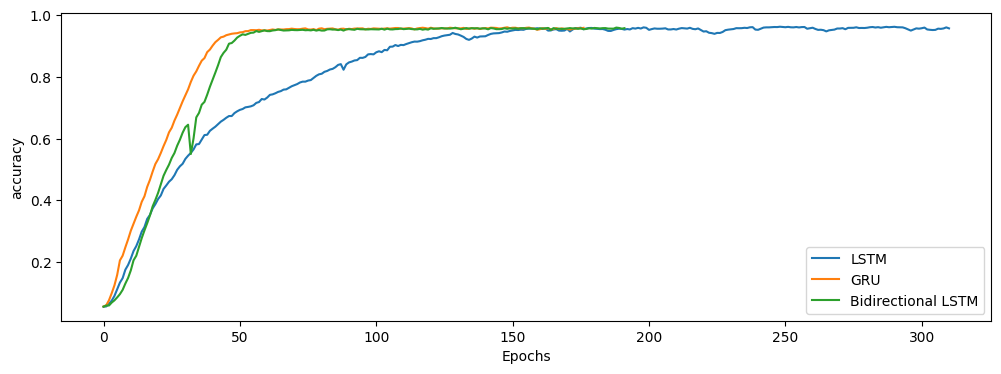

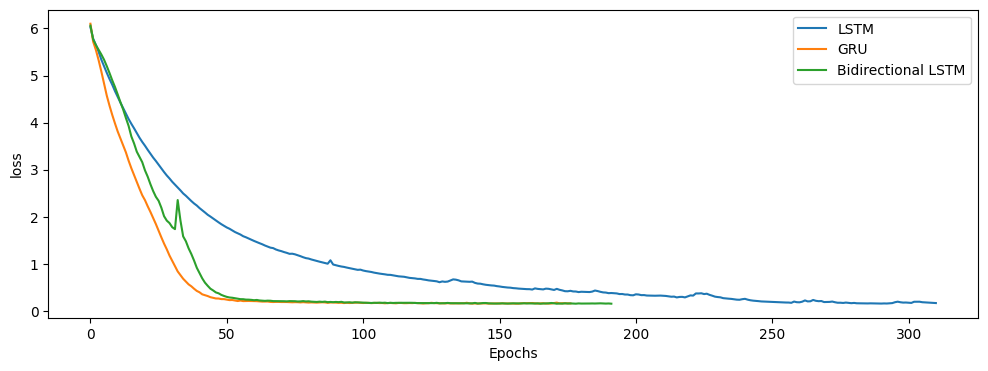

In [ ]:

def plot_graphs(history_dict, string):
    plt.figure(figsize=(12, 4))
    
    for model_name, history in history_dict.items():
        plt.plot(history.history[string], label=model_name)

    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend()
    plt.show()

history_dict = {
    "LSTM": lstm_history,
    "GRU": gru_history,
    "Bidirectional LSTM": bilstm_history
}

plot_graphs(history_dict, 'accuracy')
plot_graphs(history_dict, 'loss')

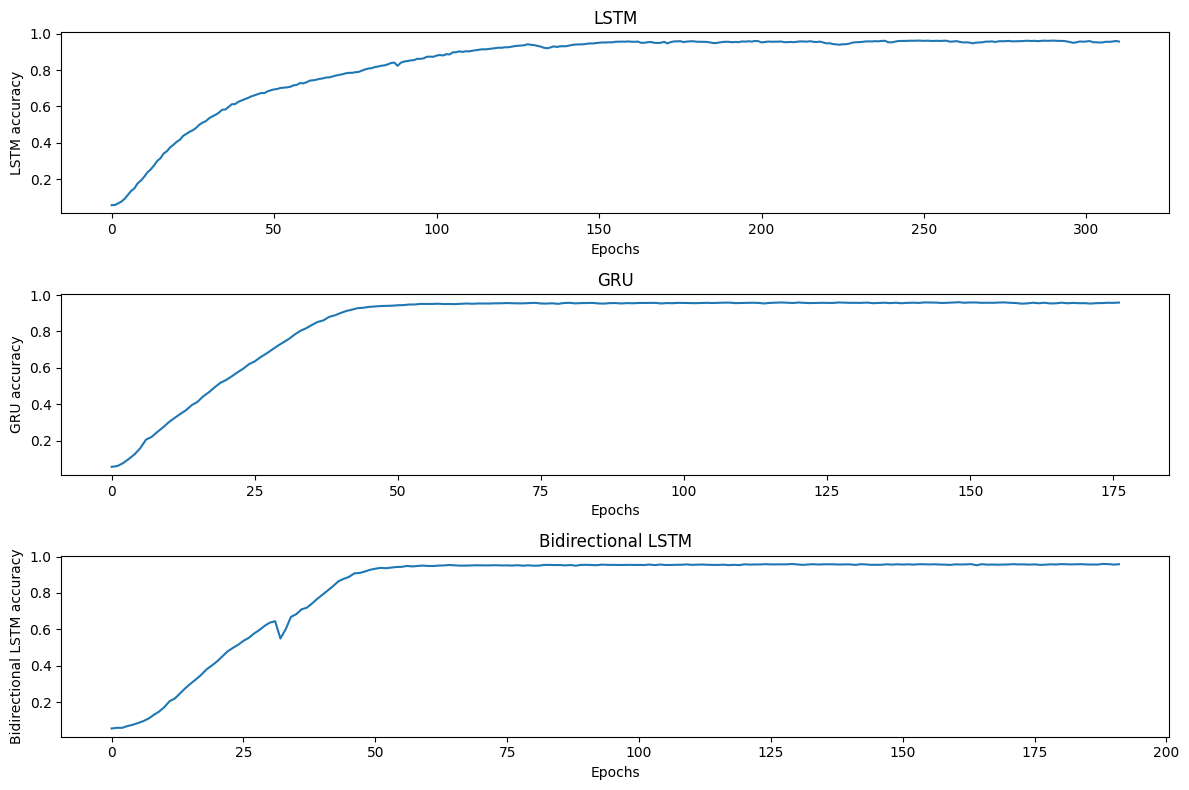

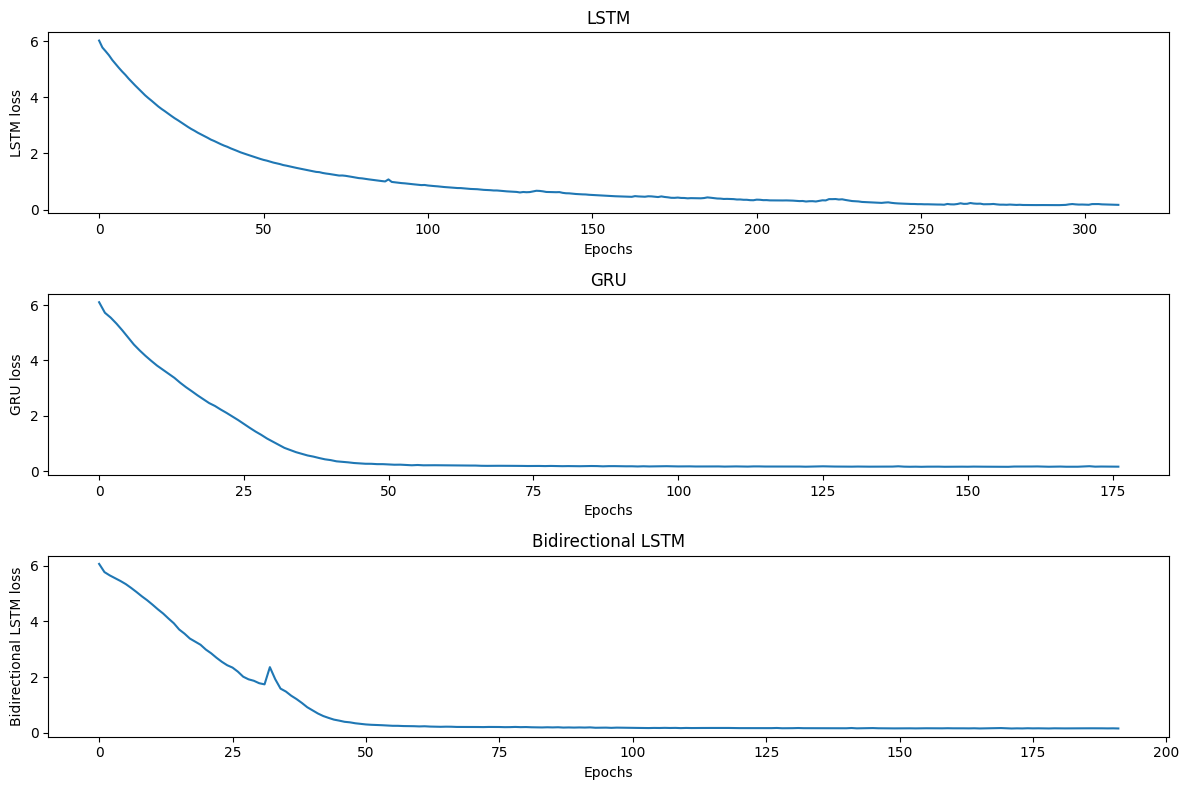

In [ ]:
def plot_graphs(history_dict, string):
    plt.figure(figsize=(12, 8))
    num_models = len(history_dict)
    plot_index = 1
    
    for model_name, history in history_dict.items():
        plt.subplot(num_models, 1, plot_index)
        plt.plot(history.history[string])
        plt.xlabel("Epochs")
        plt.ylabel(f"{model_name} {string}")
        plt.title(model_name)
        plot_index += 1

    plt.tight_layout()
    plt.show()

plot_graphs(history_dict, 'accuracy')
plot_graphs(history_dict, 'loss')

In [ ]:
# Load the models
load_bilstm_model = tf.keras.models.load_model('/content/drive/MyDrive/Data_Mining_NLP_Group_4/Codes_Documentation/TextGeneration/bilstm_model.h5')
load_lstm_model = tf.keras.models.load_model('/content/drive/MyDrive/Data_Mining_NLP_Group_4/Codes_Documentation/TextGeneration/lstm_model.h5')
load_gru_model = tf.keras.models.load_model('/content/drive/MyDrive/Data_Mining_NLP_Group_4/Codes_Documentation/TextGeneration/gru_model.h5')

# Check its architecture
bilstm_model.summary()
lstm_model.summary()
gru_model.summary()

In [30]:
def evaluate_model(model, xs, ys):
    loss, accuracy = model.evaluate(xs, ys, verbose=2)
    return loss, accuracy

# Evaluate the models
bilstm_loss, bilstm_acc = evaluate_model(bilstm_model, xs, ys)
lstm_loss, lstm_acc = evaluate_model(lstm_model, xs, ys)
gru_loss, gru_acc = evaluate_model(gru_model, xs, ys)

# Print the accuracy and loss of each model

print("\nLSTM Model:")
print("Loss:", lstm_loss)
print("Accuracy:", lstm_acc)
print("")
print("GRU Model:")
print("Loss:", gru_loss)
print("Accuracy:", gru_acc)
print("")
print("Bidirectional LSTM Model:")
print("Loss:", bilstm_loss)
print("Accuracy:", bilstm_acc)

135/135 - 16s - loss: 0.1233 - accuracy: 0.9649 - 16s/epoch - 116ms/step
135/135 - 14s - loss: 0.1467 - accuracy: 0.9631 - 14s/epoch - 102ms/step
135/135 - 4s - loss: 0.1355 - accuracy: 0.9638 - 4s/epoch - 31ms/step

LSTM Model:
Loss: 0.14669956266880035
Accuracy: 0.9630576372146606

GRU Model:
Loss: 0.13550086319446564
Accuracy: 0.9637546539306641

Bidirectional LSTM Model:
Loss: 0.12325380742549896
Accuracy: 0.9649163484573364


In [ ]:

models = {
    "LSTM": load_lstm_model,
    "GRU": load_gru_model,
    "Bidirectional LSTM": load_bilstm_model

def generate_predictions(seed_text, tokenizer, models, max_sequence_len, next_words):
    for model_name, model in models.items():
        print(f"Predictions for {model_name}:")
        generated_text = seed_text

        for _ in range(next_words):
            token_list = tokenizer.texts_to_sequences([generated_text])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
            predicted = np.argmax(model.predict(token_list), axis=1)

            output_word = " "
            for word, index in tokenizer.word_index.items():
                if index == predicted:
                    output_word = word
                    break

            generated_text += " " + output_word

        print(generated_text)
        print("\n")


# Set seed text and number of next words
seed_text = "Their team"
next_words = 10

# Generate predictions for each model
generate_predictions(seed_text, tokenizer, models, max_sequence_len, next_words)